In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import files from the directories
train = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv')
variables = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\VariableDefinitions.csv')

In [3]:
# Let's observe the shape of our datasets
print('train data shape :', train.shape)
print('test data shape:', test.shape)

train data shape : (23524, 13)
test data shape: (10086, 12)


In [4]:
#EXPLORATORY DATA ANALYSIS
#shw list of columns in train data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [5]:
# Inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Check for missing values
print('missing values:', train.isnull().sum().sum())

missing values: 0


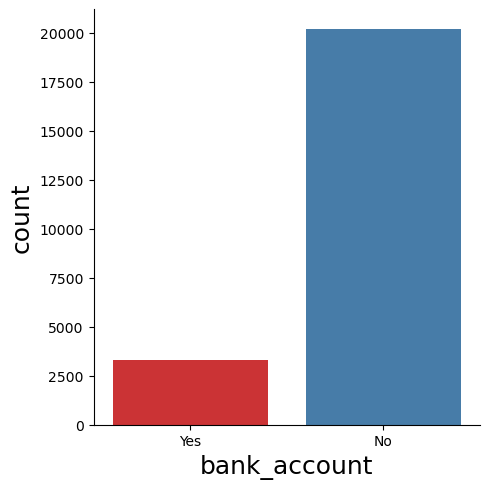

In [7]:
# Explore Target Distribution
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

In [8]:
#view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [9]:
# Show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [10]:
# Let's view the variables
variables.T #the T puts it in a tabular form so as to see full explainations

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [11]:
# UNIVARIATE ANALYSIS(individual analysis)
# Frequency table of avariable will give us 
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

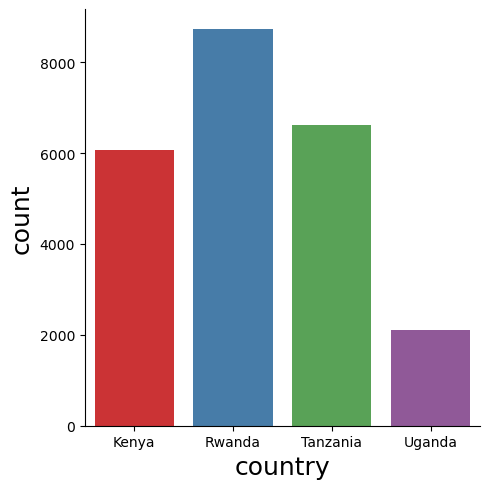

In [12]:
sns.catplot(x="country", kind="count",data=train, palette="Set1")

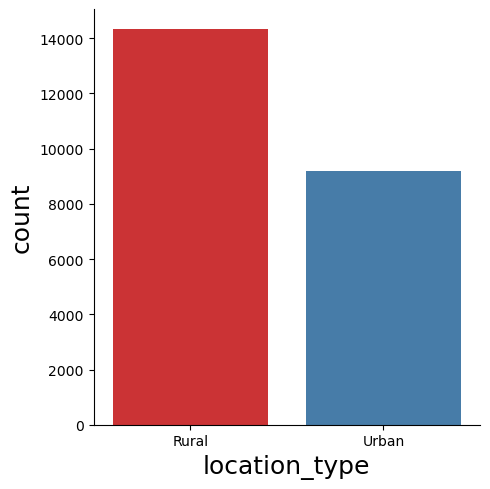

In [13]:
sns.catplot(x="location_type", kind="count",data=train, palette="Set1")

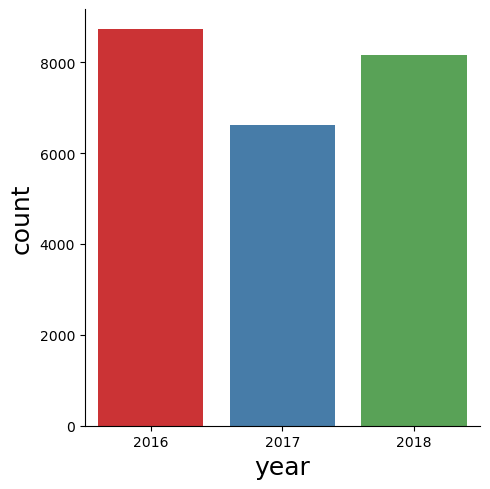

In [14]:
sns.catplot(x="year", kind="count",data=train, palette="Set1")

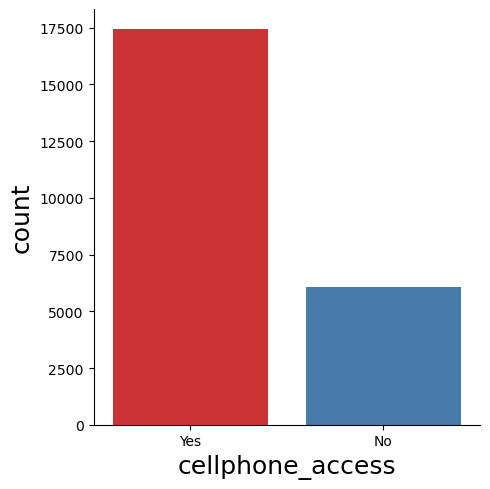

In [15]:
sns.catplot(x="cellphone_access", kind="count",data=train, palette="Set1")

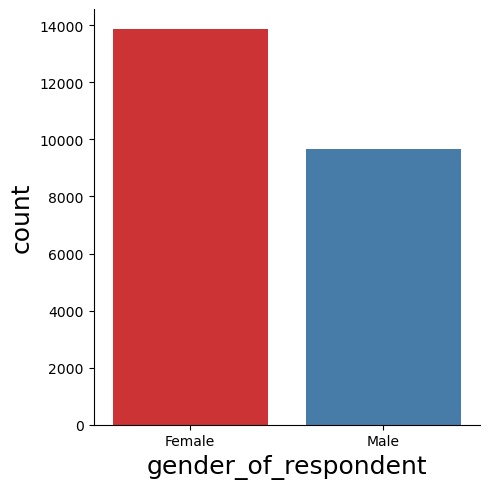

In [16]:
sns.catplot(x="gender_of_respondent", kind="count",data=train, palette="Set1")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

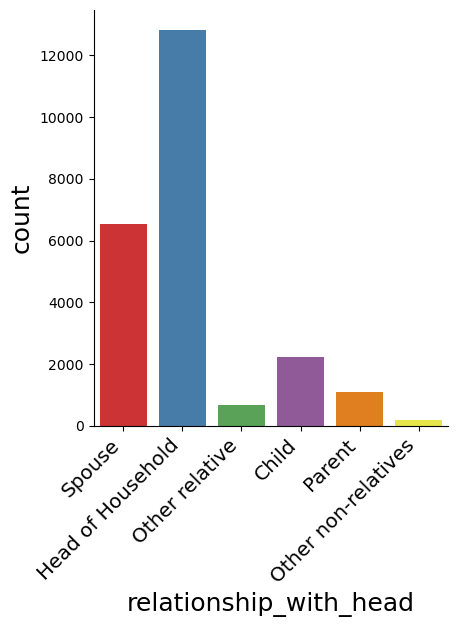

In [17]:
sns.catplot(x="relationship_with_head", kind="count",data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

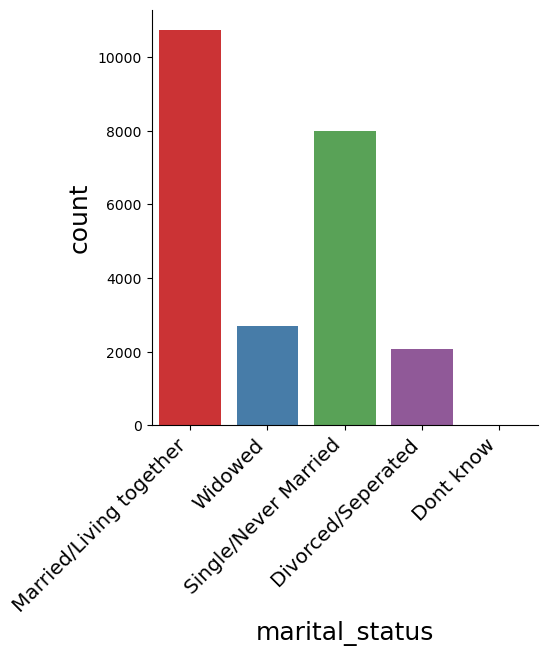

In [18]:
sns.catplot(x="marital_status", kind="count",data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

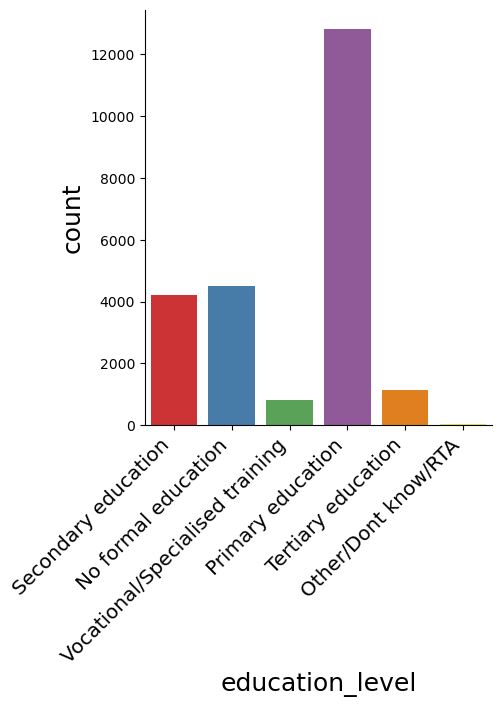

In [19]:
sns.catplot(x="education_level", kind="count",data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

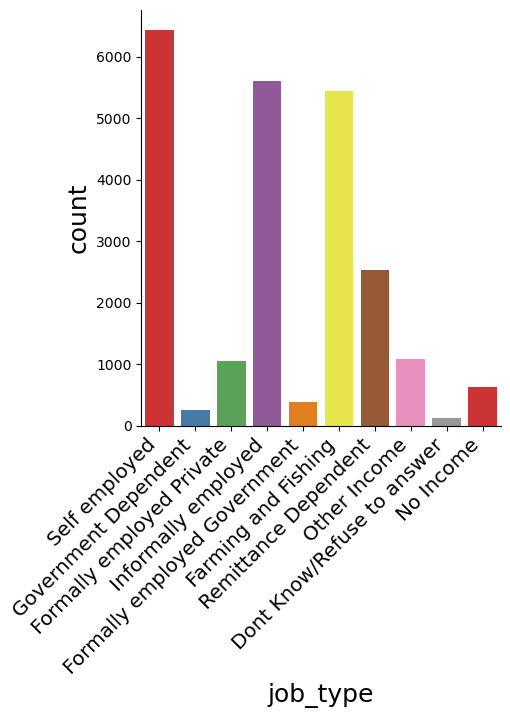

In [20]:
sns.catplot(x="job_type", kind="count",data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Text(0, 0.5, 'No of ppo')

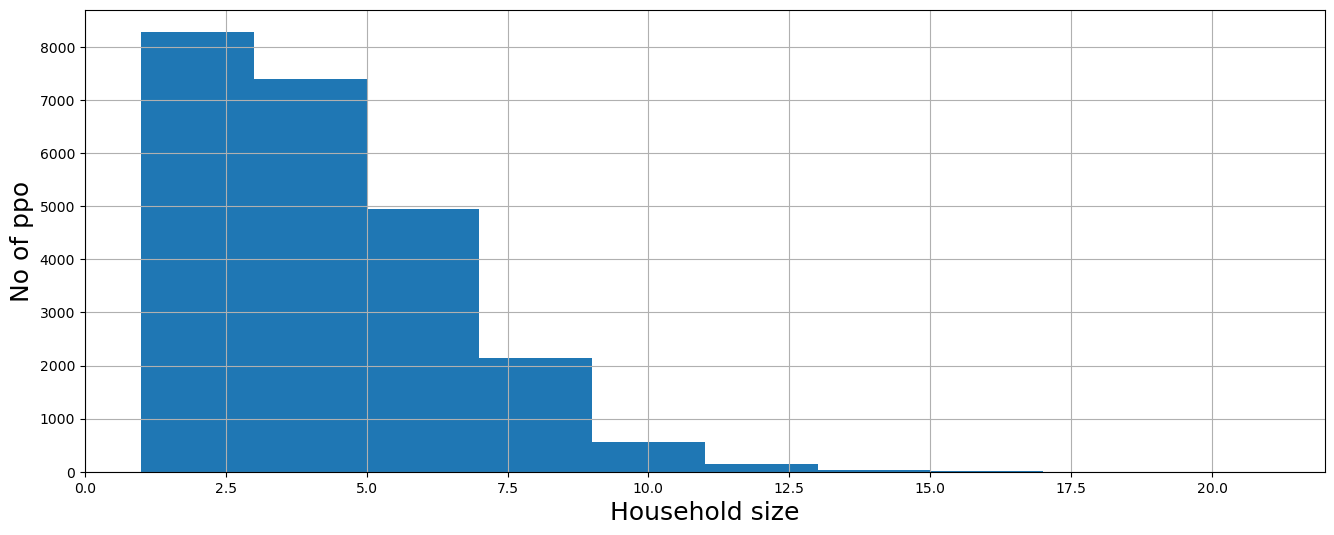

In [21]:
plt.figure(figsize=(16, 6))
train.household_size.hist()
plt.xlabel('Household size')
plt.ylabel('No of ppo')

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

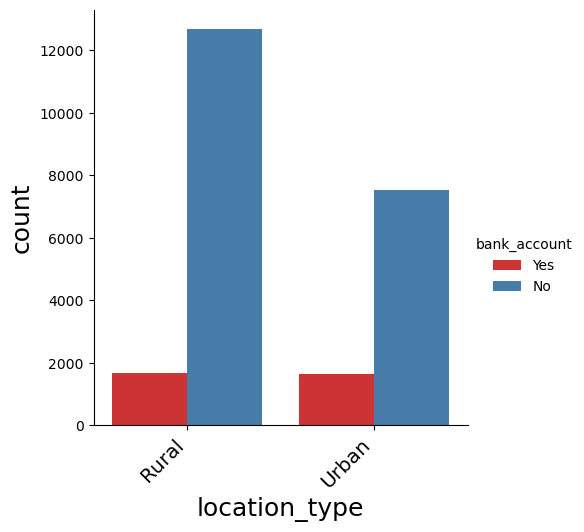

In [22]:
#BIVARIATE ANALYSIS(two variables either in comparison or similarities or relationships)

sns.catplot(x="location_type", hue="bank_account", kind="count", data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

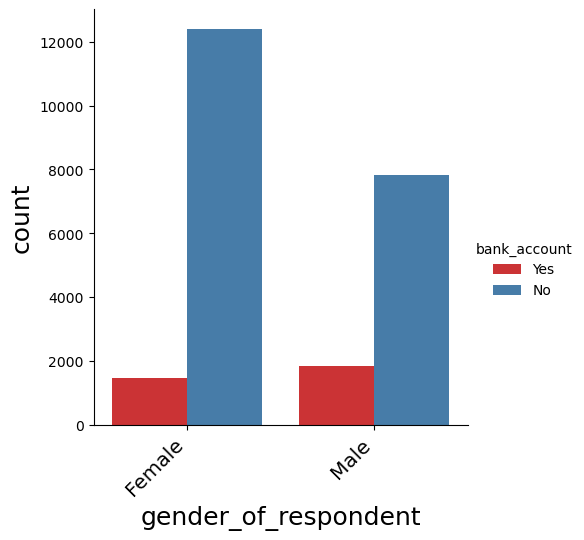

In [23]:
sns.catplot(x="gender_of_respondent", hue="bank_account", kind="count", data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

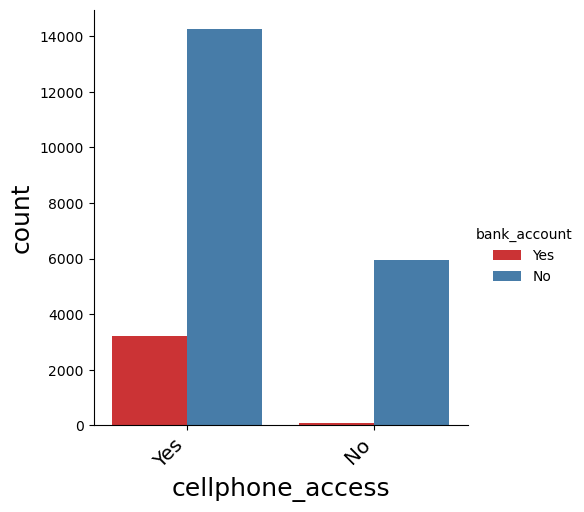

In [24]:
sns.catplot(x="cellphone_access", hue="bank_account", kind="count", data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

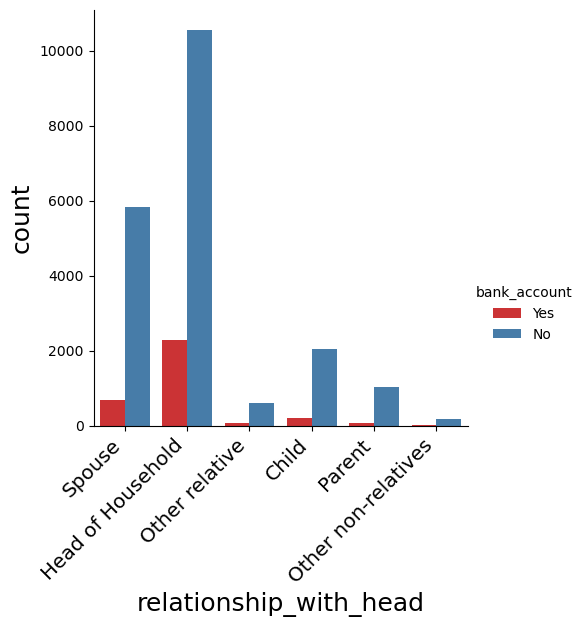

In [25]:
sns.catplot(x="relationship_with_head", hue="bank_account", kind="count", data=train, palette="Set1")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

In [57]:
#Import preprocessing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#convert target label to numerical data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

# separate training features from target
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [58]:
# Function to preprocess our data from train models
def preprocessing_data(data):
    
    #convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # Categorical features to be converted to one hot encoding
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]

    #One Hot Encoding
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"]) 
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # Drop uniqueid column
    data = data.drop(["uniqueid"], axis=1)

    # Scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data


In [59]:
# Preprocess the train data
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)

In [60]:
#MODEL SELECTION
import sklearn.model_selection

In [61]:
# Split train data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(processed_train, y_train, stratify = y_train, test_size = 28, random_state = 42)

In [62]:
# Import classifier algorithm here
from xgboost import XGBClassifier

# Create model
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the model
xg_y_model = xg_model.predict(x_val)

accuracy_score = accuracy_score(y_val, xg_y_model)
print('Accuracy is = ', accuracy_score)

# get error rate 
print("Error rate of XGB classifier:", 1 - accuracy_score)

Accuracy is =  0.9285714285714286
Error rate of XGB classifier: 0.0714285714285714


In [64]:
#print the classification report
from sklearn.metrics import classification_report

report = classification_report(y_val, xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28



Error rate for XGBClassifier model is:  0.0714285714285714
Confusion Matrix:
[[1.  0. ]
 [0.5 0.5]]


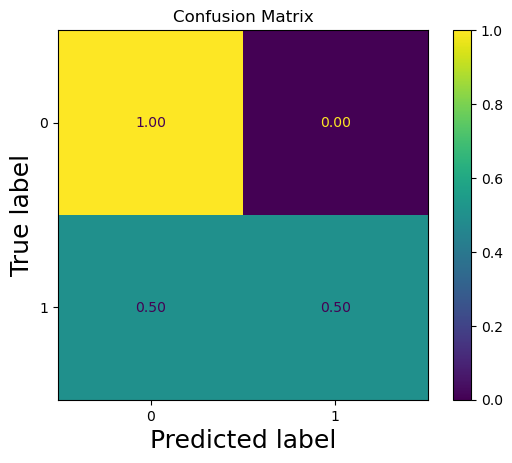

In [66]:
#calc the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

xgboost_model_predicted = xg_model.predict(x_val)
score = accuracy_score(y_val, xgboost_model_predicted)
print("Error rate for XGBClassifier model is: ", 1 - score)

# calculate confusion matrix 
cm = confusion_matrix(y_val, xgboost_model_predicted, normalize='true')
print("Confusion Matrix:")
print(cm)

#plot confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap='viridis', values_format='.2f')
plt.title("Confusion Matrix")
plt.show()

In [67]:
#Get the predicted result for the test data
test.bank_account = xg_model.predict(processed_test)

In [68]:
# Create submission DataFrame
submission = pd.DataFrame({
    "uniqueid": test["uniqueid"] + " x " + test["country"], 
    "bank_account": test.bank_account
})

In [70]:
#show the five sample
submission.sample(15)

,uniqueid,bank_account
1182,uniqueid_7251 x Kenya,1
2624,uniqueid_8746 x Rwanda,0
3112,uniqueid_9247 x Rwanda,0
3794,uniqueid_9929 x Rwanda,0
4319,uniqueid_10454 x Rwanda,0
675,uniqueid_6744 x Kenya,0
3572,uniqueid_9707 x Rwanda,0
5671,uniqueid_11806 x Rwanda,0
7905,uniqueid_8180 x Tanzania,0
6477,uniqueid_6752 x Tanzania,0


In [71]:
#Create a submission file in jupyter notebook and download it for 
from IPython.display import FileLink
submission.to_csv('submission1.csv', index=False)

In [72]:
#Display a download link
FileLink('submission1.csv')

C:\Users\Students\submission1.csv

In [83]:
#in case of an excel file
from IPython.display import FileLink
submission.to_excel('submission2.xlsx', index=False)

In [84]:
#display a download link
FileLink('submission2.xlsx')

C:\Users\Students\submission2.xlsx